# Interactive Visualization Lab

Complete the following set of exercises to solidify your knowledge of interactive visualization using Plotly, Cufflinks, and IPyWidgets.

In [1]:
import pandas as pd

import cufflinks as cf
from ipywidgets import interact

import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()



In [2]:
data = pd.read_excel('../data/Online Retail.xlsx')
data.to_csv()

data.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
3,536390,2010-12-01 10:19:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,64,2.55,163.2,17511,United Kingdom
4,536394,2010-12-01 10:39:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.6,13408,United Kingdom


## 1. Create an interactive bar chart showing total quantity and revenue by country (excluding United Kingdom) for the month of April 2011.

In [37]:

data['Month'] = data['InvoiceDate'].dt.month

# data.head()
by_month = data.groupby(['Month', 'Country'])['Revenue', 'Quantity'].sum().reset_index()

by_month.head()

april = by_month[(by_month.Country != 'United Kingdom') * by_month.Month == 4] 

by_country = april.groupby(['Country'])['Revenue', 'Quantity'].sum()

by_country.iplot(kind = 'bar')



## 2. Create an interactive line chart showing quantity and revenue sold to France between January 1st and May 31st 2011.

In [64]:
import calendar
import datetime

# data.head()

data['Year'] = data['InvoiceDate'].dt.year
data['Day'] = data['InvoiceDate'].dt.day

by_year = data.groupby(['Year', 'Country', 'Month', 'Day'])['Revenue', 'Quantity'].sum().reset_index()

by_year.head()

time = by_year[(by_year.Country == 'France') * by_year.Year == 2011] 

time.head()

month = time[(time.Month >= 1) * time.Month <= 5 ] 

month

by_first_quarter = month.groupby(['Country'])['Revenue', 'Quantity'].sum()

by_first_quarter.iplot(kind = 'bar')


## 3. Create an interactive scatter plot showing the relationship between average quantity (x-axis) and average unit price (y-axis) for the product PARTY BUNTING with the plot points color-coded by country (categories).

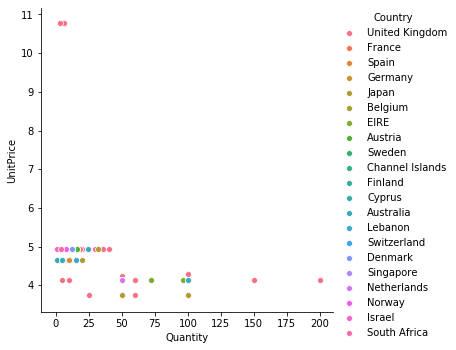

In [112]:

import seaborn as sns

product = data[data['Description'].str.contains('PARTY BUNTING')]

sns.pairplot(x_vars=['Quantity'], y_vars=['UnitPrice'], data = product, hue = "Country", height = 5)

## 4. Create a set of interactive histograms showing the distributions of quantity per invoice for the following countries: EIRE, Germany, France, and Netherlands.

In [97]:
data.columns

by_invoice = data.groupby(['Country'])['Quantity', 'InvoiceNo'].sum().reset_index()

by_invoice.head()

countries = ['EIRE', 'Germany', 'France', 'Netherlands']

country = by_invoice.query(f"Country in {countries}")

qty_per_invoice = country.groupby(['Country'])['InvoiceNo', 'Quantity'].sum()

qty_per_invoice.iplot(kind = 'hist')

## 5. Create an interactive side-by-side bar chart showing the revenue by country listed below (bars) for each of the products listed below.

In [104]:
product_list = ['JUMBO BAG RED RETROSPOT', 
                'CREAM HANGING HEART T-LIGHT HOLDER',
                'REGENCY CAKESTAND 3 TIER']

country_list = ['EIRE', 'Germany', 'France', 'Netherlands']

df = data.query(f"Country in {country_list} | Description in {product_list}")
df.head()


,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country,Month,Year,Day
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom,12,2010,1
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom,12,2010,1
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom,12,2010,1
3,536390,2010-12-01 10:19:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,64,2.55,163.2,17511,United Kingdom,12,2010,1
4,536394,2010-12-01 10:39:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.6,13408,United Kingdom,12,2010,1


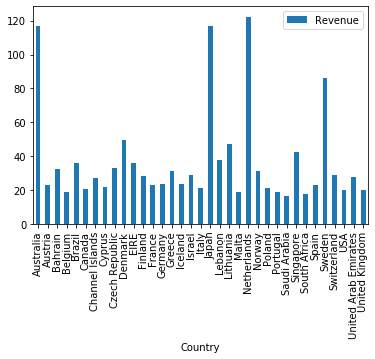

In [5]:
# pd.plotting.scatter_matrix(df[['Country', 'Revenue']])

# by_country.columns

df = data.pivot_table(
    index = ['Country'],
    values = ['Revenue'],
)

df.plot(kind='bar')

# df[['Country', 'Revenue', 'Description']].iplot(kind = 'bar')  ## works but not what i need

# Bonus Questions

## 6. Create an interactive line chart showing quantity sold by day for the United Kingdom. Add drop-down boxes for Year and Month that allow you to filter the date range that appears in the chart.

In [ ]:
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year
data['Month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['Day'] = pd.DatetimeIndex(data['InvoiceDate']).day
uk = data[data['Country']=='United Kingdom']

## 7. Create an interactive scatter plot that plots number of invoices (x-axis) vs. number of customers (y-axis) and the plot points represent individual products. Add two sliders that control the x and y axis ranges.

In [ ]:
agg_func = {'InvoiceNo':'nunique',
            'Quantity':'sum',
            'UnitPrice':'mean',
            'Revenue':'sum',
            'CustomerID':'nunique'}

products = uk.groupby('Description').agg(agg_func)

## 8. Creat an interactive bar chart that shows revenue by product description. Add a text field widget that filters the results to show the product that contain the text entered in their description.